## Vector Autoregression

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#get_ipython().run_line_magic('matplolib', 'inline')
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
from dateutil.parser import parse
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

from IPython.display import display, Markdown

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.width', 800)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv(r'D:\TCC\Microdados_SUS\series_temporais\Dow_Jones_Industrial_Average.csv', parse_dates=True)

columns = ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

#Formating date
df.Date = df.Date.apply(lambda x : parse(x))

df.sort_values(by='Date', ascending=True, inplace=True, ignore_index=True)

df = df[['Date','Price','Open','High','Low']]

df[['Price','Open','High','Low']] = df[['Price','Open','High','Low']].apply(lambda x: x.str.replace(',',''))

df[['Price','Open','High','Low']] = df[['Price','Open','High','Low']].apply(pd.to_numeric, errors = 'coerce', axis=1)

In [3]:
#Seleção do período

start_date = datetime(2016,1,14)
end_date = datetime(2017,1,30)

df = df[(df['Date'] > start_date) & (df['Date'] <= end_date)]

date_df = df['Date'].to_list()

df = df.reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   262 non-null    int64         
 1   Date    262 non-null    datetime64[ns]
 2   Price   262 non-null    float64       
 3   Open    262 non-null    float64       
 4   High    262 non-null    float64       
 5   Low     262 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 12.4 KB


In [4]:
df.iloc[-1]

index                   2030
Date     2017-01-30 00:00:00
Price               19971.13
Open                20028.62
High                20028.62
Low                 19870.39
Name: 261, dtype: object

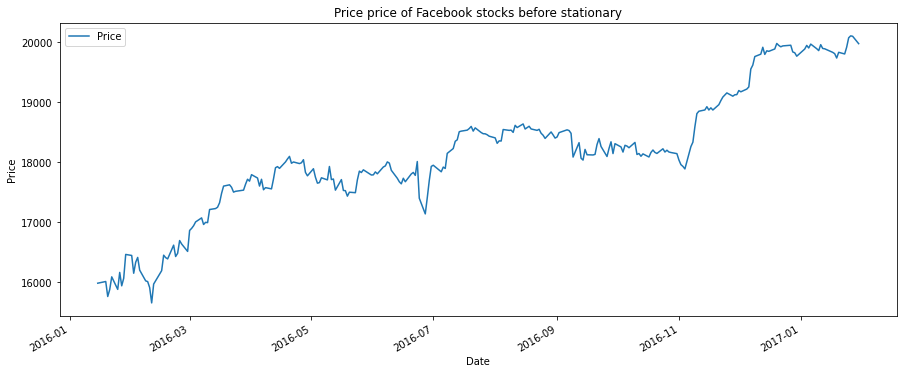

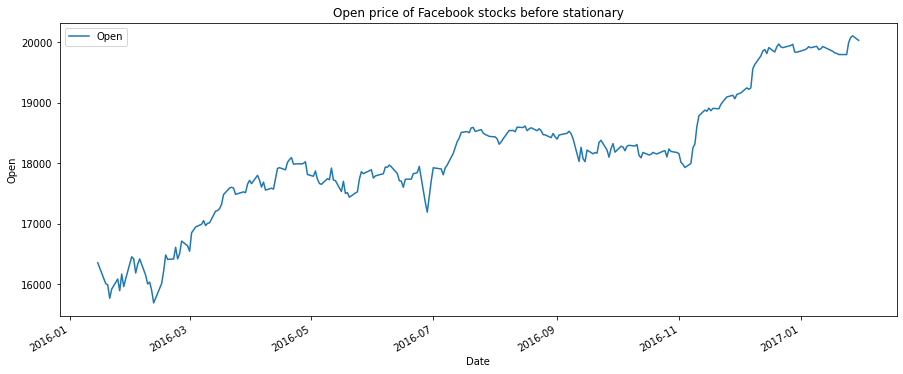

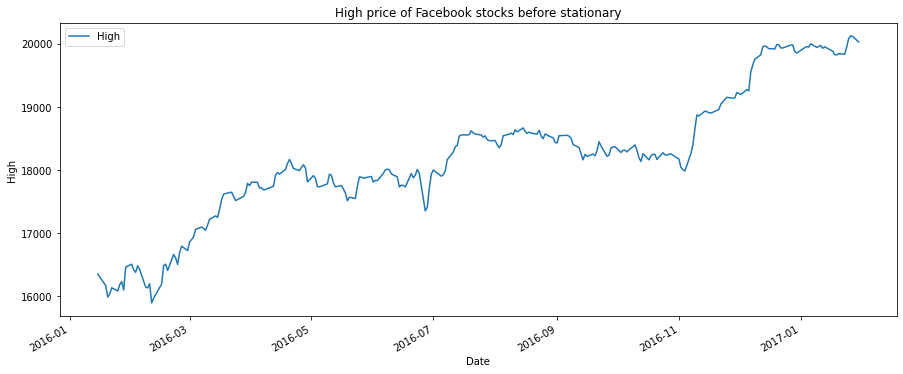

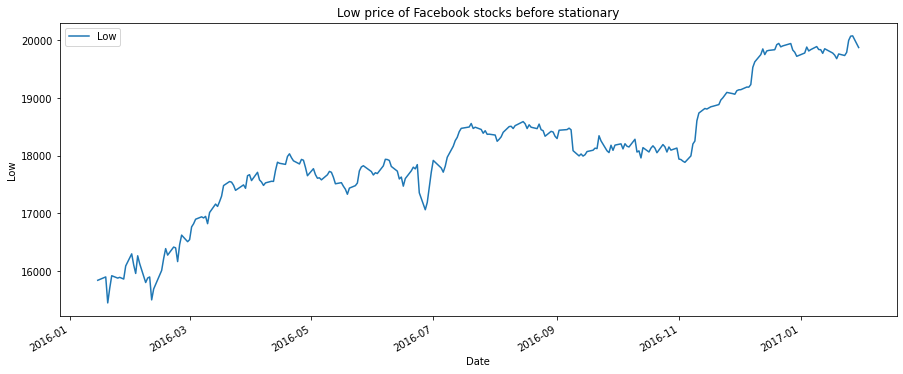

In [5]:
for c in df[['Price','Open','High','Low']]:
    df.plot(x = 'Date', y = str(c), figsize=(15,6))
    plt.xlabel('Date')
    plt.ylabel(c)
    plt.title(f'{str(c)} price of Facebook stocks before stationary')
    plt.show()

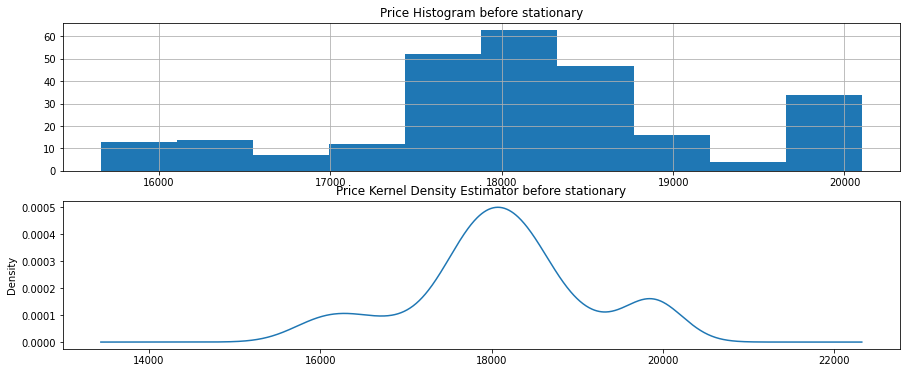

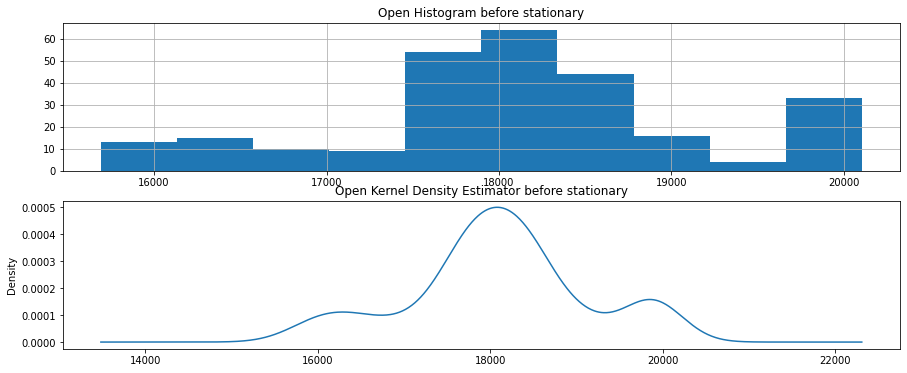

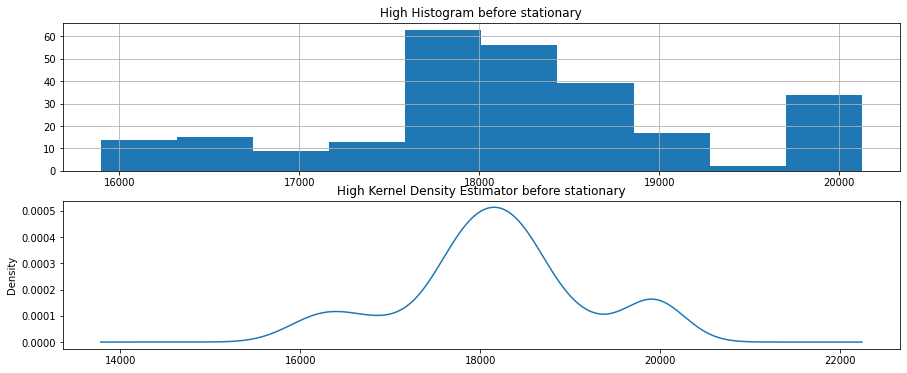

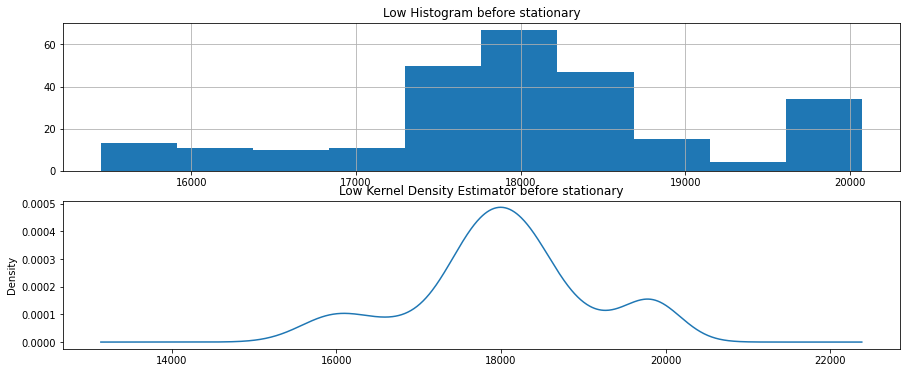

In [6]:
for c in df[['Price','Open','High','Low']]:
    df[str(c)].plot(figsize=(15,6))
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f'{str(c)} Histogram before stationary')
    df[str(c)].hist()
    plt.subplot(212)
    df[str(c)].plot(kind='kde')
    plt.title(f'{str(c)} Kernel Density Estimator before stationary')
    plt.show()

In [7]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        return np.mean(np.abs((y_true-y_pred)/y_true)) * 100
    
    print(f'Mean Squared Error (MSE) is : {metrics.mean_squared_error(y_true,y_pred)}')

    print(f'Mean Absolute Error (MAE) is : {metrics.mean_absolute_error(y_true,y_pred)}')

    print(f'Root Mean Squared Error (MAE) is : {np.sqrt(metrics.mean_squared_error(y_true,y_pred))}')

    print(f'Coefficient of determination R^2 is : {metrics.r2_score(y_true,y_pred)}', end = '\n\n')

    return


def Augmented_Dickey_Fuller_Test_func(series, column_name):

    print(f'Results of Dickey-Fuller Test for column {column_name}')

    dftest = adfuller(series, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=[   'Test Statistic',
                                                'p-value',
                                                'No Lags Used',
                                                'Number of Observartions Used'])
    
    for key, value in dftest[4].items():
        
        dfoutput['Critical Value (%s)' %key] = value

    print(dfoutput)

    if dftest[1] <= 0.05:
        print('Conclusion:====>')
        print('Reject the null hypothesis')
        print('Data is stationary')
    else:
        print('Conclusion:====>')
        print('Fail to reject the null hypothesis')
        print('Data is non-stationary')

In [8]:
for name, column in df[['Price','Open','High','Low']].iteritems():

    Augmented_Dickey_Fuller_Test_func(df[name], name)

    print('\n')

Results of Dickey-Fuller Test for column Price
Test Statistic                  -1.27
p-value                          0.64
No Lags Used                     0.00
Number of Observartions Used   261.00
Critical Value (1%)             -3.46
Critical Value (5%)             -2.87
Critical Value (10%)            -2.57
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column Open
Test Statistic                  -0.78
p-value                          0.83
No Lags Used                     0.00
Number of Observartions Used   261.00
Critical Value (1%)             -3.46
Critical Value (5%)             -2.87
Critical Value (10%)            -2.57
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column High
Test Statistic                  -1.24
p-value                          0.66
No Lags Used                     2.00
Number of Observartions Used   

In [9]:
X = df[['Price','Open','High','Low']]

train, test = X[0:-30], X[-30:]

train_diff = train.diff()
train_diff.dropna(inplace = True)

In [10]:
test

,Price,Open,High,Low
232,19852.24,19811.50,19951.29,19811.50
233,19843.41,19909.01,19923.17,19821.00
234,19883.06,19836.66,19917.78,19832.95
235,19974.62,19920.59,19987.63,19920.42
236,19941.96,19968.97,19986.56,19941.96
237,19918.88,19922.68,19933.83,19882.19
238,19933.81,19908.61,19934.15,19899.06
239,19945.04,19943.46,19980.24,19939.80
240,19833.68,19964.31,19981.11,19827.31
241,19819.78,19835.46,19878.44,19788.94


In [11]:
for name, column in train_diff[['Price','Open','High','Low']].iteritems():

    Augmented_Dickey_Fuller_Test_func(train_diff[name], name)

    print('\n')

Results of Dickey-Fuller Test for column Price
Test Statistic                 -16.49
p-value                          0.00
No Lags Used                     0.00
Number of Observartions Used   230.00
Critical Value (1%)             -3.46
Critical Value (5%)             -2.87
Critical Value (10%)            -2.57
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column Open
Test Statistic                 -15.77
p-value                          0.00
No Lags Used                     0.00
Number of Observartions Used   230.00
Critical Value (1%)             -3.46
Critical Value (5%)             -2.87
Critical Value (10%)            -2.57
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column High
Test Statistic                 -11.74
p-value                          0.00
No Lags Used                     1.00
Number of Observartions Used   229.00
Critical Value (1

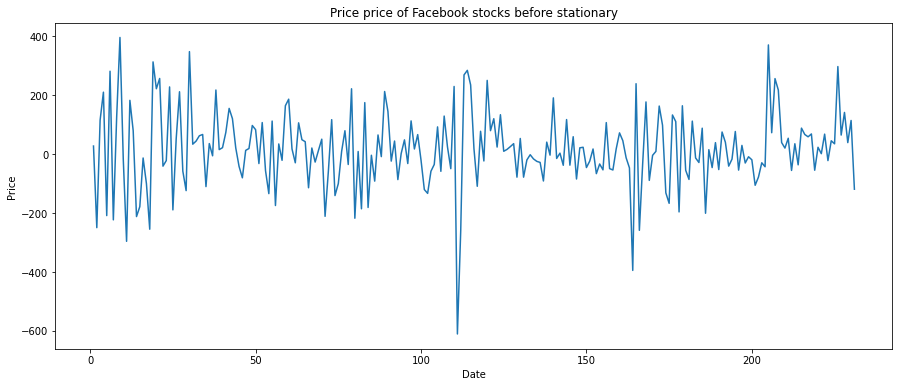

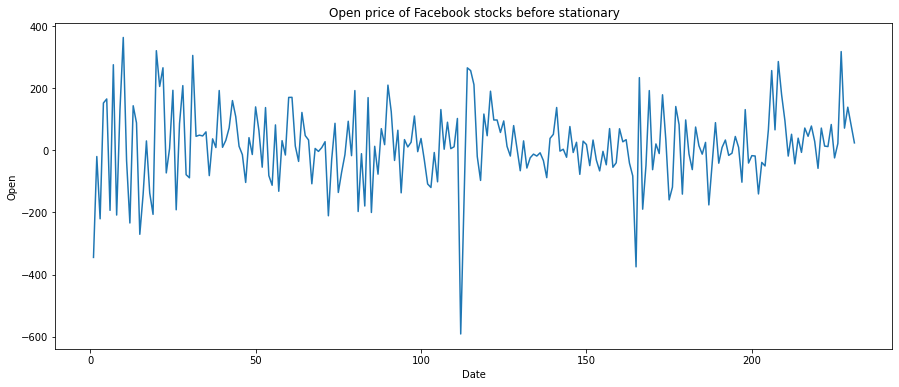

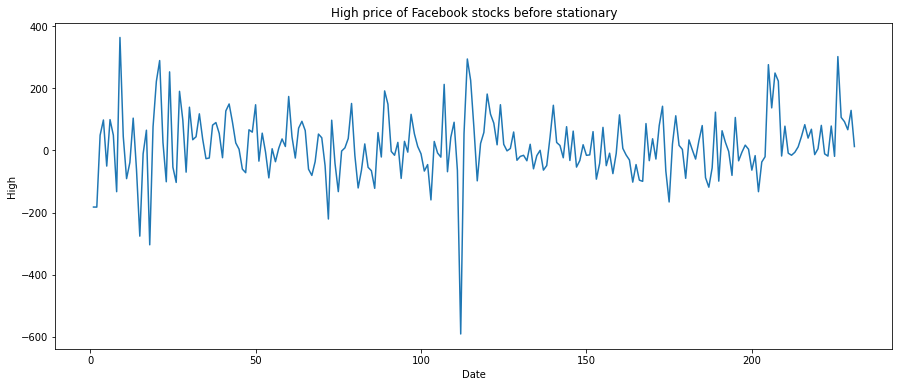

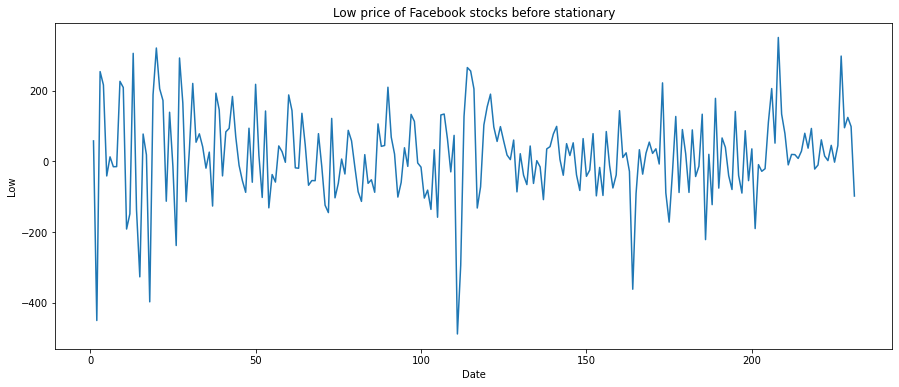

In [12]:
for c in train_diff[['Price','Open','High','Low']]:
    train_diff[str(c)].plot(figsize=(15,6))
    plt.xlabel('Date')
    plt.ylabel(c)
    plt.title(f'{str(c)} price of Facebook stocks before stationary')
    plt.show()

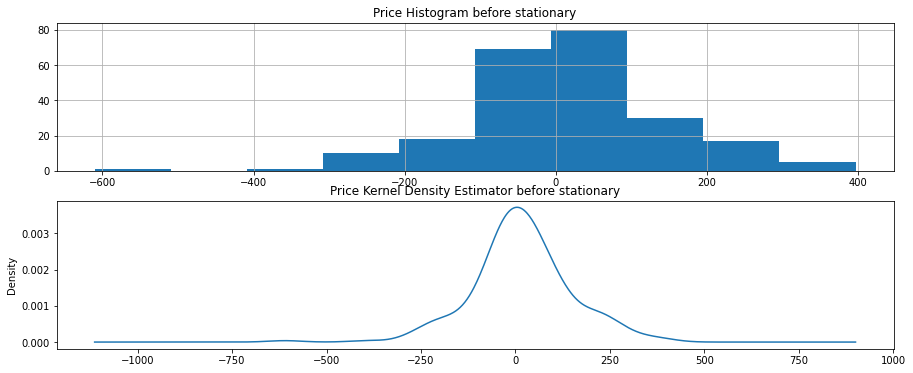

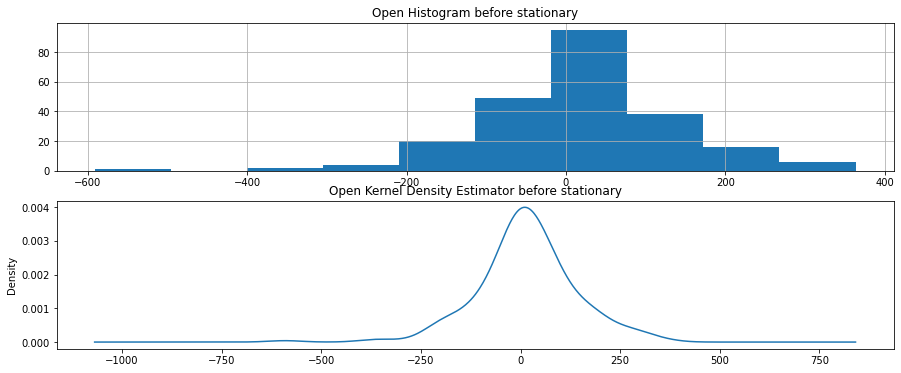

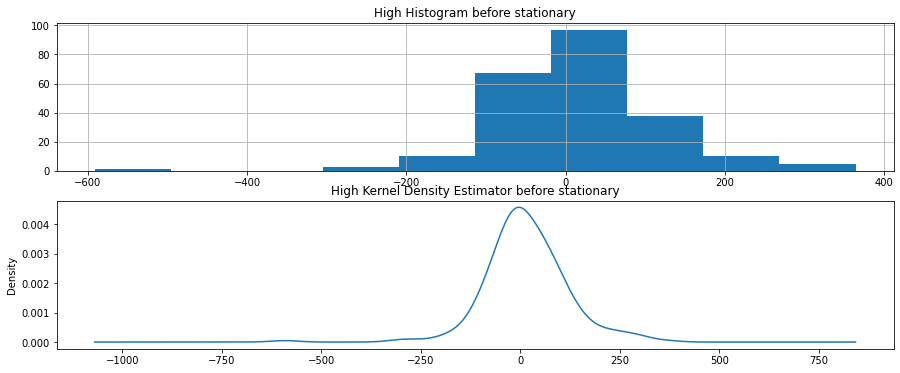

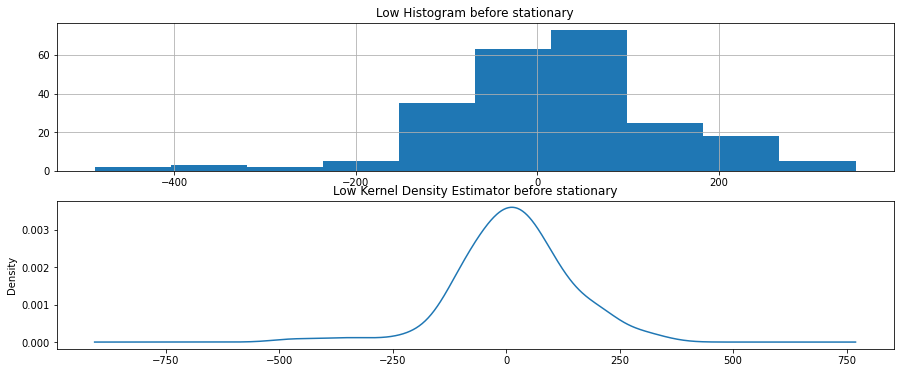

In [13]:
for c in train_diff[['Price','Open','High','Low']]:
    train_diff[str(c)].plot(figsize=(15,6))
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f'{str(c)} Histogram before stationary')
    train_diff[str(c)].hist()
    plt.subplot(212)
    train_diff[str(c)].plot(kind='kde')
    plt.title(f'{str(c)} Kernel Density Estimator before stationary')
    plt.show()

In [14]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegratrion_test(df):
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]

    def adjust(val, length=6):
        return str(val).ljust(length)
    print('Column Name > Test Stat > C(95%)  =>  Signif \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2),9), '> ', adjust(cvt,8), '=> ', trace > cvt )

cointegratrion_test(train_diff[['Price','Open','High','Low']])


Column Name > Test Stat > C(95%)  =>  Signif 
 ----------------------------------------
Price  >  311.42    >  40.1749  =>  True
Open   >  201.81    >  24.2761  =>  True
High   >  102.08    >  12.3212  =>  True
Low    >  32.3      >  4.1296   =>  True


In [15]:
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train_diff)
    results = model.fit(i)
    print(f'Order: {i}, AIC: {results.aic}, BIC: {results.bic}')

Order: 1, AIC: 32.32973378863832, BIC: 32.62869720680556
Order: 2, AIC: 31.791328528064216, BIC: 32.331127620326015
Order: 3, AIC: 31.53628350196044, BIC: 32.318414961195664
Order: 4, AIC: 31.519213949393475, BIC: 32.54519016608394
Order: 5, AIC: 31.53037443948787, BIC: 32.80172373125279
Order: 6, AIC: 31.564483403601958, BIC: 33.08275024902615
Order: 7, AIC: 31.583146200091665, BIC: 33.34989147694517
Order: 8, AIC: 31.63392781174544, BIC: 33.65072903969492
Order: 9, AIC: 31.659108309285816, BIC: 33.92755989720067


In [16]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns:
        df_res[col + '_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[col].cumsum()
    return df_res

In [17]:
results = model.fit(4)
display(results.summary())
z = results.forecast(y=train_diff[['Price','Open','High','Low']].values, steps=30)
df_pred = pd.DataFrame(z, columns=['Price','Open','High','Low'])
df_pred["new_index"] = range(232,262)
df_pred = df_pred.set_index('new_index')

df_pred['Price']


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 18, Jul, 2022
Time:                     19:05:51
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    32.5452
Nobs:                     227.000    HQIC:                   31.9332
Log likelihood:          -4797.83    FPE:                4.88775e+13
AIC:                      31.5192    Det(Omega_mle):     3.66145e+13
--------------------------------------------------------------------
Results for equation Price
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           18.440598         8.847466            2.084           0.037
L1.Price         0.162903         0.178108            0.915           0.360
L1.Open          0.733398         0.448084            1.637           0.102
L1.H

new_index
232    -8.13
233   -14.82
234    65.19
235    13.71
236    20.06
237     6.67
238    28.35
239    13.75
240    10.21
241    17.54
242    18.94
243    16.49
244    15.97
245    16.04
246    16.84
247    16.88
248    16.17
249    16.29
250    16.65
251    16.61
252    16.44
253    16.43
254    16.51
255    16.53
256    16.50
257    16.47
258    16.49
259    16.51
260    16.50
261    16.49
Name: Price, dtype: float64

In [18]:
actual_df = df[['Price','Open','High','Low']]

res = inverse_diff(actual_df,df_pred)

res

,Price,Open,High,Low,Price_1st_inv_diff,Open_1st_inv_diff,High_1st_inv_diff,Low_1st_inv_diff
new_index,,,,,,,,
232,-8.13,-87.63,-94.23,-60.94,19963.00,19940.99,19934.39,19809.45
233,-14.82,-3.43,-10.77,16.20,19948.18,19937.56,19923.62,19825.65
234,65.19,-2.04,38.88,30.78,20013.36,19935.52,19962.50,19856.44
235,13.71,52.15,40.90,32.65,20027.07,19987.67,20003.40,19889.08
236,20.06,19.53,14.66,27.52,20047.13,20007.21,20018.06,19916.61
237,6.67,16.05,6.65,4.41,20053.80,20023.26,20024.71,19921.01
238,28.35,9.26,18.67,19.64,20082.15,20032.52,20043.38,19940.65
239,13.75,26.63,23.16,20.78,20095.90,20059.15,20066.54,19961.43
240,10.21,14.07,12.16,13.21,20106.11,20073.22,20078.70,19974.64


In [19]:
for i in ['Price','Open','High','Low']:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)], res[str(i)+'_1st_inv_diff'])

Evaluation metric for Price
Mean Squared Error (MSE) is : 121464.03084954871
Mean Absolute Error (MAE) is : 314.2463783187849
Root Mean Squared Error (MAE) is : 348.5169018133105
Coefficient of determination R^2 is : -15.033311754027118

Evaluation metric for Open
Mean Squared Error (MSE) is : 97295.70443353268
Mean Absolute Error (MAE) is : 273.88730517878525
Root Mean Squared Error (MAE) is : 311.9225936567159
Coefficient of determination R^2 is : -14.915969209522602

Evaluation metric for High
Mean Squared Error (MSE) is : 76739.70658562351
Mean Absolute Error (MAE) is : 234.46818522370486
Root Mean Squared Error (MAE) is : 277.0193252927014
Coefficient of determination R^2 is : -12.788431673964814

Evaluation metric for Low
Mean Squared Error (MSE) is : 85123.38205539518
Mean Absolute Error (MAE) is : 241.05524387443037
Root Mean Squared Error (MAE) is : 291.75911649063374
Coefficient of determination R^2 is : -8.968054056015



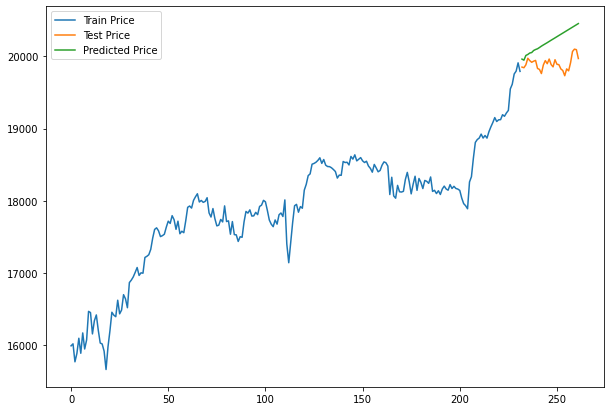

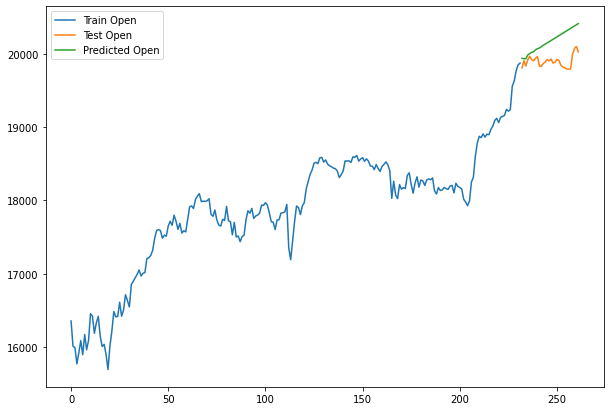

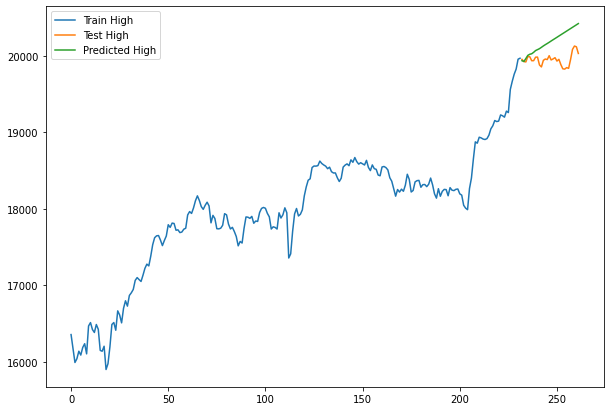

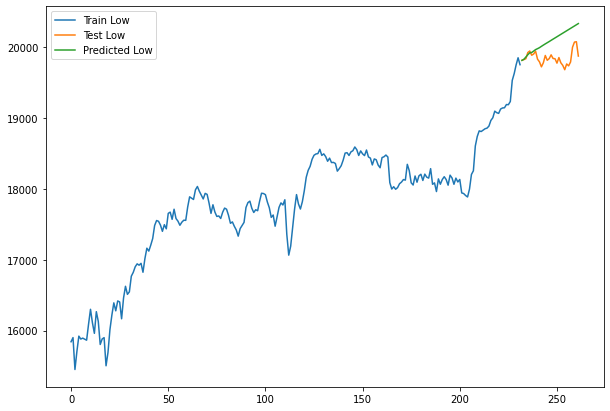

In [20]:
for i in ['Price','Open','High','Low']:
    plt.rcParams['figure.figsize'] = [10,7]
    plt.plot(train[i], label='Train '+i)
    plt.plot(test[i], label='Test '+i)
    plt.plot(res[i+'_1st_inv_diff'], label = 'Predicted '+i)
    plt.legend(loc='best')
    plt.show()
